# chapter 06 | 차원 축소

## 01. 차원 축소(Dimension Reduction) 개요
#### 차원 축소란?
매우 많은 피처로 구성된 다차원 데이터 세트의 차원을 축소해 새로운 차원의 데이터 세트를 생성하는 것

#### 피처가 많을 때(고차원)의 문제점
- 적은 차원에서 학습된 모델보다 예측 신뢰도 떨어짐
- 개별 피처끼리의 상관관계가 높을 가능성 높음
- 선형 모델에서 입력 변수 간의 상관관계가 높을 경우 다중 공선성 문제로 모델의 예측 성능 저하

#### 차원 축소의 장점
- 데이터에 대한 직관적인 해석 가능 = 시각화
- 학습에 필요한 처리 능력(시간, 컴퓨터 사양 등)을 축소

#### 차원 축소의 종류
- 피처 선택(feature selection)
: 특정 피처에 종속성이 강한 불필요한 피처 제거 + 데이터의 특징을 잘 나타내는 주요 피처만 선택
- 피처 추출(feature extraction)
: 기존 피처를 저차원의 중요 피처로 압축해서 추출 - 기존의 피처와는 완전히 다른 값

#### 차원 축소의 활용
- 이미지 데이터에서 잠재된 특성을 피처로 도출 - 과적합 ↓, 예측 성능 ↑
- 텍스트 문서의 숨겨진 의미를 추출

## 02. PCA(Principal Component Analysis)
- 여러 변수 간에 존재하는 상관관계를 이용해 이를 대표하는 주성분(Principal Component)을 추출해 차원을 축소  
- 목표 : 차원 축소시 기존 데이터의 정보 유실을 최소화
- 가장 높은 분산을 가지는 데이터의 축을 찾아 이 축으로 차원을 축소 = PCA의 주성분

#### 가장 높은 분산을 가지는 축 = 고유 벡터
- 행렬을 공간으로 해석

$$Cx = \lambda x$$
$$C : 공분산\ 행렬(Covariance\ Matrix), x : 고유벡터(Eigenvector) , \lambda : 고유값(Eigenvalue) $$

- 고유벡터 : 행렬 C를 곱하더라도 방향이 변하지 않고 크기만 변하는 벡터
- 고유벡터+고유값은 여러개 존재 가능, 정방행렬(Diagonal Matrix)은 최대 그 차원 수(피처 개수, 변수 개수)만큼의 고유벡터를 가질 수 있음
- 공분산 행렬 : ~~정방행렬(Diagonal Matrix)~~ + 대칭행렬(Symmetric Matrix)
- 대칭행렬 → ~~고유벡터를 직교행렬(Orthogonal Matrix)로, 고유값을 정방행렬로 대각화 가능~~

#### 공분산 (covariance matrix)
: 두 확률 변수 사이의 선형 관계 값. `np.cov()` 사용  
$$ 모집단\ \ Cov(x,y) = \frac{\sum{(x_{i}-\bar{x})(y_{i}-\bar{y})}}{N}$$
$$ ✔️ 표본\ \ Cov(x,y) = \frac{\sum{(x_{i}-\bar{x})(y_{i}-\bar{y})}}{N-1}$$

#### 공분산의 기하하적 의미 [링크](https://angeloyeo.github.io/2019/07/27/PCA.html)
- 행렬은 선형변환이고, 하나의 벡터 공간을 선형적으로 다른 벡터 공간으로 매핑한다.  
- 공분산 행렬은 원래 원의 형태로 주어졌던 데이터를 선형적으로 흩뿌려준다.
<img src="https://miro.medium.com/max/1400/1*JuzOTNDCsXArVM5-rznv4w.png" width="50%">

> 공분산 행렬의 고유 벡터는 데이터가 어떤 방향으로 분산되어 있는지를 나타내준다고 할 수 있다. 고유 값은 고유벡터 방향으로 얼마만큼의 크기로 벡터공간이 늘려지는 지를 얘기한다1. 따라서 고유 값이 큰 순서대로 고유 벡터를 정렬하면 결과적으로 중요한 순서대로 주성분을 구하는 것이 된다. 


#### cf. 상관계수행렬(correlation matrix) 
: 공분산 행렬을 정규화시킨 행렬, 대각성분이 모두 1이다. `np.corr()` 사용
$$Corr(x,y) = \frac{Cov(x,y)}{S_{x}\ S_{y}}\ 
where\ S_{x}^{2} = \frac{1}{N-1} \sum{(x_{i} - \bar{x})^{2}}, S_{y}^{2} = \frac{1}{N-1} \sum{(y_{i} - \bar{y})^{2}}$$

#### 공분산 행렬의 분해
$$C = [e_1 ... e_n] \begin{bmatrix} \lambda_{1} & \cdots & 0 \\ \cdots & \cdots & \cdots \\ 0 & \cdots & \lambda_{n} \end{bmatrix} \begin{bmatrix} e_{1}^{t} \\ \cdots \\ e_{n}^{t} \end{bmatrix}$$  
$$e_{i} : 고유벡터(Eigenvector-orthogonal), \lambda_{i} : 고유값(Eigenvalue) $$

#### →  PCA = 공분산 행렬이 고유벡터와 고유값으로 분해될 수 있으며, 분해된 고유벡터를 이용해 입력 데이터를 선형 변환하는 방식
1. 입력 데이터 세트의 공분산 행렬 생성
2. 공분산 행렬의 고유벡터와 고유값 계산
3. 고유값이 가장 큰 순서로 K개(PCA 변환 차수)만큼 고유벡터 추출
4. 고유값이 가장 큰 순서로 추출된 고유벡터를 이용해 새롭게 입력 데이터 변환

In [74]:
import numpy as np
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings(action='ignore')

In [6]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
from sklearn.datasets import load_iris

cols = ['sepal_length','sepal_width', 'petal_length', 'petal_width']

iris = load_iris()
data = iris.data
target = iris.target

iris_df = pd.DataFrame(data, columns = cols)
iris_df['target'] = target

iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


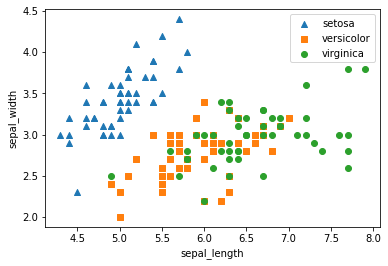

In [11]:
markers = ['^','s','o']

for i, mark in enumerate(markers):
    x_data = iris_df[iris_df['target']==i]['sepal_length']
    y_data = iris_df[iris_df['target']==i]['sepal_width']
    plt.scatter(x_data, y_data, marker=mark, label=iris.target_names[i])
    
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.legend()

- setosa 품종의 경우 sepal_width가 3.0보다 크고, sepal_length가 6.0이하인 곳에 일정하게 분포
- versicolor, virginica 품종의 경우 sepal_width와 sepal_length 조건만으로 분류가 어려움

PCA : 4개 속성 → 2개로 압축 + 시각화
### 1. 스케일링

array([[<AxesSubplot:title={'center':'sepal_length'}>,
        <AxesSubplot:title={'center':'sepal_width'}>],
       [<AxesSubplot:title={'center':'petal_length'}>,
        <AxesSubplot:title={'center':'petal_width'}>]], dtype=object)

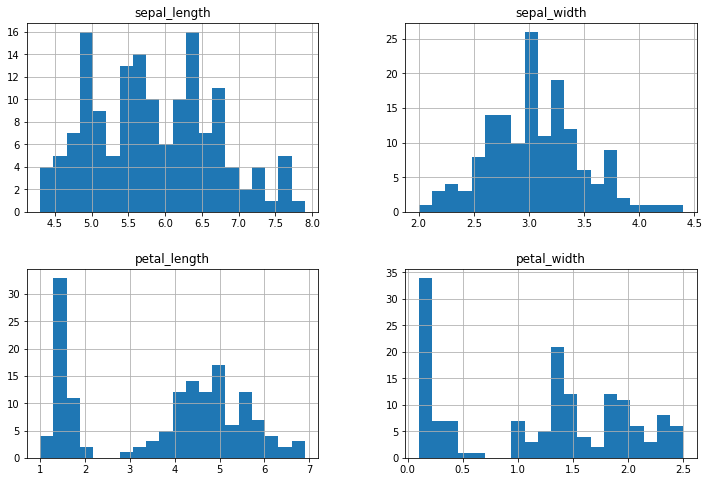

In [16]:
# 스케일링 전
iris_df[cols].hist(bins=20, figsize=(12,8))

<class 'numpy.ndarray'>


<ipython-input-34-5f935d800874>:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(str(220+i))


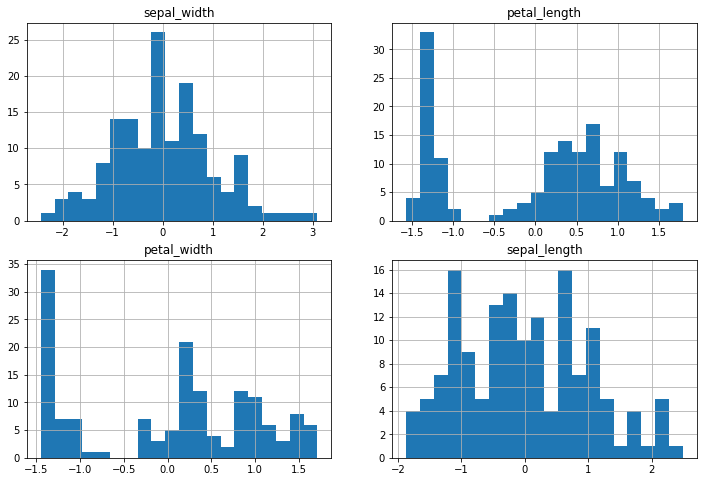

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_df[cols])
print(type(iris_scaled))

# 스케일링 후 
plt.figure(figsize=(12,8))
for i in range(4):
    plt.subplot(str(220+i))
    plt.hist(iris_scaled[:,i], bins=20)
    plt.title(iris_df.columns[i])
    plt.grid()


### 2. PCA
```
class sklearn.decomposition.PCA(n_components=None, *, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', random_state=None
```
- n_components : 변환할 차원의 수

In [37]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

print(iris_scaled.shape)
print(iris_pca.shape)


(150, 4)
(150, 2)


In [38]:
pca_cols = ['pca_comp_1', 'pca_comp_2']
iris_pca_df = pd.DataFrame(iris_pca, columns=pca_cols)
iris_pca_df['target'] = iris_df['target']
iris_pca_df.head()

,pca_comp_1,pca_comp_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


### 3. 시각화

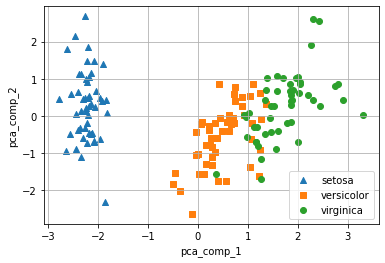

In [123]:
markers = ['^','s','o']

for i, mark in enumerate(markers):
    x_data = iris_pca_df[iris_pca_df['target']==i]['pca_comp_1']
    y_data = iris_pca_df[iris_pca_df['target']==i]['pca_comp_2']
    plt.scatter(x_data, y_data, marker=mark, label=iris.target_names[i])
    
plt.xlabel('pca_comp_1')
plt.ylabel('pca_comp_2')
plt.grid()
plt.legend()

In [121]:
# 함수로 정의

def get_pca_plot(iris_pca_df) :
    markers = ['^','s','o']
    
    plt.figure()
    for i, mark in enumerate(markers):
        x_data = iris_pca_df[iris_pca_df['target']==i]['pca_comp_1']
        y_data = iris_pca_df[iris_pca_df['target']==i]['pca_comp_2']
        plt.scatter(x_data, y_data, marker=mark, label=iris.target_names[i])

    plt.xlabel('pca_comp_1')
    plt.ylabel('pca_comp_2')
    plt.grid()
    plt.legend()

- PCA 변환 후, pca_comp_1을 기반으로 setosa 품종 구분 가능
- versicolor, virginica 겹치는 부분이 일부 존재하지만 비교적 잘 구분

### 4. 변동성 비율 (variance ratio) 확인
- 원본 데이터의 변동성(variance)을 얼마나 반영하고 있는지 확인
- 속성 `explained_variance_ratio_` : 전체 변동성에서 개별 PCA 컴포넌트들로 차지하는 variance 비율을 제공

*공식문서 [링크](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)*
#### explained_variance_ndarray of shape (n_components,)
The amount of variance explained by each of the selected components. The variance estimation uses n_samples - 1 degrees of freedom.

Equal to n_components largest eigenvalues of the covariance matrix of X.

#### explained_variance_ratio_ndarray of shape (n_components,)
Percentage of variance explained by each of the selected components.

If n_components is not set then all components are stored and the sum of the ratios is equal to 1.0.



In [44]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

→ 첫번째 PCA 변환 요소인 pca_comp_1이 전체 변동성의 72.9% 차지, pca_comp_2이 전체 변동성의 22.8% 차지 = 원본 데이터의 변동성을 총 95% 설명 가능    
*변동성을 잘 설명한다는 말이 뭔지 잘 모르겠다???*

In [45]:
# cf. explained_variance = eigenvalues of covariance matrix of X
pca.explained_variance_

array([2.93808505, 0.9201649 ])

### 5. 원본 데이터로 학습 vs PCA 데이터로 학습
- RandomForestClassifier 이용 + cross_val_score(cv=3) 교차 검증으로 정확도 비교

In [58]:
# 원본 데이터로 학습
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
scores = cross_val_score(rf, iris_df[cols],iris_df['target'], cv=3, scoring='accuracy')
print(scores)
print("→ mean :", np.round(np.mean(scores),4))

[0.98 0.94 0.96]
→ mean : 0.96


In [62]:
# PCA 데이터로 학습

pca_X = iris_pca_df[['pca_comp_1', 'pca_comp_2']]

rf = RandomForestClassifier()
scores = cross_val_score(rf, pca_X, iris_df['target'], cv=3, scoring='accuracy')
print(scores)
print("→ mean :", np.round(np.mean(scores),4))

[0.88 0.88 0.9 ]
→ mean : 0.8867


- 예측 성능의 정확도 원본 데이터 대비 10% 하락
- 속성 개수가 50% 감소
- PCA 변환 후에도 원본 데이터의 특성을 상당부분 유지


### 6. 신용카드 고객 데이터

In [68]:
df = pd.read_excel('credit_card.xls', header=1, sheet_name='Data').iloc[0:,1:]
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [71]:
mapper = {'PAY_0':'PAY_1', 'default payment next month':'default'}
df.rename(columns=mapper, inplace=True)
y_target = df['default']
X_features = df.drop('default', axis=1)

print(X_features.shape, y_target.shape)

(30000, 23) (30000,)


<AxesSubplot:>

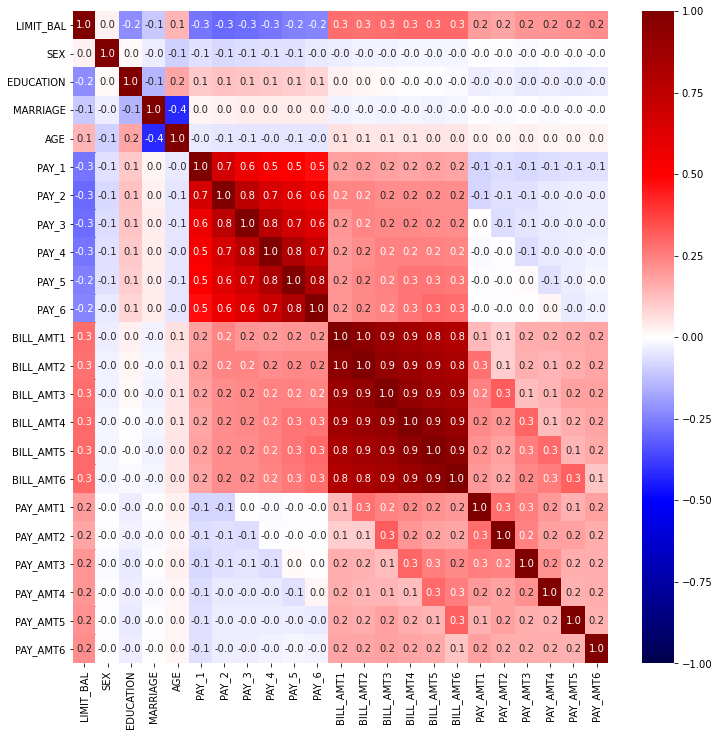

In [81]:
corr = X_features.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr, cmap='seismic', vmax=1, vmin=-1, annot=True, fmt='.1f')

In [101]:
cols_bill = ['BILL_AMT'+str(i) for i in range(1,7)]

X_bill = X_features[cols_bill]

scaler = StandardScaler()
X_bill_scaled = scaler.fit_transform(X_bill)

pca = PCA(n_components=2)
pca.fit(X_bill_scaled)
X_bill_pca = pca.transform(X_bill)

var_ratio = pca.explained_variance_ratio_
print(var_ratio)
print(np.round(np.sum(var_ratio)*100,2),"%")

# without scaler [0.9066601 , 0.05004773] 

[0.90555253 0.0509867 ]
95.65 %


단 2개의 PCA 컴포넌트만으로 6개 속성의 변동성을 95% 이상 설명할 수 있으며, 특히 <U>첫번째 PCA 축으로 90% 변동성을 수용할 정도로 6개의 속성의 상관도가 매우 높다.</U>*

#### 원본 데이터 학습 vs PCA 데이터 학습

In [105]:
rf = RandomForestClassifier()

scaler = StandardScaler()
X_features_scaled = scaler.fit_transform(X_features)

scores = cross_val_score(rf, X_features_scaled, y_target, cv=3, scoring='accuracy')
print(scores)
print(np.mean(scores)) 

# without scaler 0.81563

[0.8066 0.8205 0.8205]
0.8158666666666666


In [107]:
rf = RandomForestClassifier()

pca = PCA(n_components=6)
X_pca = pca.fit_transform(X_features_scaled)

scores_pca = cross_val_score(rf, X_pca, y_target, cv=3, scoring='accuracy')
print(scores_pca)
print(np.mean(scores_pca))

[0.7884 0.7942 0.801 ]
0.7945333333333333


→ 약 25% 속성 개수를 줄이고, 약 1~2%의 성능 저하  
→ PCA의 뛰어난 압축 성능

cf. PCA 차원 축소가 많이 쓰이는 분야 : 컴퓨터 비전(computer vision) - 얼굴 인식 Eigen-face

## 03. LDA(Linear Discriminant Analysis)
- 선형 판별 분석법
- 저차원 공간에 투영(PCA와 공통점)
- 지도학습 분류에 사용하기 쉽도록 <U>개별 클래스를 분별할 수 있는 기준을 최대한 유지</U>하면서 차원 축소(PCA와 차이점)
- <U>클래스간 분산(between-class scatter) + 클래스 내부 분산(within-class scatter)</U> 비율을 최대화

<img src='https://user-images.githubusercontent.com/38090151/130062549-5a33f178-e574-4e79-a565-517879e7fc70.png' width='50%'>

### LDA 방식
1. 클래스 내부와 클래스 간 분산 행렬 ← 입력 데이터의 결정 값 클래스별로 개별 피처의 평균 벡터(mean vector)를 기반으로
2. 클래스 내부 분산 행렬 $S_{W}$, 클래스 간 분산 행렬을 $S_{B}$라고 한다면 다음 식으로 두 행렬을 고유 벡터로 분해 가능
$$S_{W}^{T}S_{B} = [e_1 ... e_n]\begin{bmatrix} \lambda_{1} \cdots 0  \\ \cdots \cdots \cdots \\ 0 \cdots \lambda_{n} \end{bmatrix} \begin{bmatrix} e_{1}^{T} \\ \cdots \\ e_{n}^{T} \end{bmatrix} $$
3. 고유값(eigenvalue)이 가장 큰 순으로 K개(LDA 변환 차수)만큼 추출
4. 고유값(eigenvalue)이 가장 큰 순으로 추출된 고유벡터(eigenvector)를 이용해 새롭게 입력 데이터를 변환

### 붓꽃 데이터 세트에 LDA 적용하기
- LDA는 지도학습이기 때문에 클래스 값 입력

In [109]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris = load_iris()
iris_scaled = StandardScaler().fit_transform(iris.data)

lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(iris_scaled, iris.target) # 클래스 값 입력

iris_lda = lda.transform(iris_scaled)
print(iris_lda.shape)

(150, 2)


- LDA 변환 값 2차원 평면에 품종별로 시각화

In [110]:
lda_cols = ['lda_comp_1', 'lda_comp_2']
iris_lda_df = pd.DataFrame(iris_lda, columns=lda_cols)
iris_lda_df['target'] = iris.target
iris_lda_df.head()

,lda_comp_1,lda_comp_2,target
0,-8.061800,0.300421,0
1,-7.128688,-0.786660,0
2,-7.489828,-0.265384,0
3,-6.813201,-0.670631,0
4,-8.132309,0.514463,0


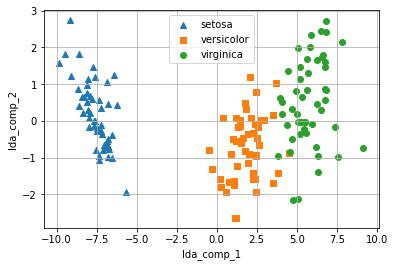

In [112]:
markers = ['^','s','o']

plt.figure()
for i, mark in enumerate(markers):
    x_data = iris_lda_df[iris_lda_df['target']==i][lda_cols[0]]
    y_data = iris_lda_df[iris_lda_df['target']==i][lda_cols[1]]
    
    plt.scatter(x_data, y_data, marker=mark, label=iris.target_names[i])
    
plt.grid()
plt.xlabel(lda_cols[0])
plt.ylabel(lda_cols[1])
plt.legend()

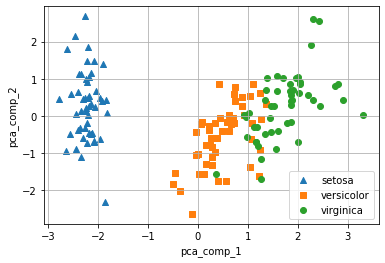

In [122]:
# PCA와 비교    
get_pca_plot(iris_pca_df)

## 04. SVD(Sigular Value Decomposition)